# Analysis of: 212booter
#### File originally retrieved from: http://4lz5rmnkd6f63tmm.onion/db/212booter.sql

In [1]:
dumpfile='212booter.sql'

## * Libraries that I use to analyse data

In [2]:
import pandas as pd
import numpy as np

from io import StringIO
import re

from IPython.display import display,clear_output

In [3]:
%run '../additional_functions.ipynb'

 Functions loaded!!!!


<h2 align="center">
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<br>
STEP 1: Adaptation to our Booter database schema<br>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</h2> 

## 1. Reading the first 'N' (100) lines of the input Booter database file

In [4]:
lines_to_read=100

with open(dumpfile) as myfile:
    firstlines=myfile.readlines()[0:lines_to_read] #put here the interval you want
    for x in firstlines:
        print(x.strip())

-- phpMyAdmin SQL Dump
-- version 3.5.8
-- http://www.phpmyadmin.net
--
-- Host: localhost
-- Generation Time: Jul 31, 2013 at 11:23 PM
-- Server version: 5.5.32-cll
-- PHP Version: 5.3.17

SET SQL_MODE="NO_AUTO_VALUE_ON_ZERO";
SET time_zone = "+00:00";


/*!40101 SET @OLD_CHARACTER_SET_CLIENT=@@CHARACTER_SET_CLIENT */;
/*!40101 SET @OLD_CHARACTER_SET_RESULTS=@@CHARACTER_SET_RESULTS */;
/*!40101 SET @OLD_COLLATION_CONNECTION=@@COLLATION_CONNECTION */;
/*!40101 SET NAMES utf8 */;

--
-- Database: `a12boote_booter`
--

-- --------------------------------------------------------

--
-- Table structure for table `API`
--

CREATE TABLE IF NOT EXISTS `API` (
`id` int(11) NOT NULL AUTO_INCREMENT,
`UDP` text NOT NULL,
`type` varchar(11) NOT NULL,
PRIMARY KEY (`id`)
) ENGINE=MyISAM  DEFAULT CHARSET=latin1 AUTO_INCREMENT=3 ;

--
-- Dumping data for table `API`
--

INSERT INTO `API` (`id`, `UDP`, `type`) VALUES
(1, 'http://bestbooter.com/send.php?key=84751657816548979848416&host=[host]&time=[time

## 2. Listing tables that have content inserted into the dump file

In [5]:
tables=enumerate(list_tables_with_insert(dumpfile))

for i, item in tables:
    print(i+1,item)

1 API
2 blacklist
3 fe
4 gateway
5 iplogs
6 loginlogs
7 loginlogs
8 logs
9 logs
10 logs
11 messages
12 news
13 payments
14 plans
15 referrals
16 skype_api
17 users


<h2 align='center'>======================================================================
Adapting EACH existing table
======================================================================</h2>

## 6.1. Table: 'API'

### How this table looks like without modification?

In [6]:
tablename='API'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,id,UDP,type
0,1,http://bestbooter.com/send.php?key=84751657816...,NaN
1,2,NaN,NaN


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? NO
    - This table looks like: 
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type/converter: 
        o    
    - On the column name:
        o  
    - Split columns:
        o 
    - Add required columns:
        o 

## 6.2. Table: 'blacklist'

### How this table looks like without modification?

In [7]:
tablename='blacklist'

# Only displaying the results
pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,ID,IP,note
0,10,198.46.128.21,http://www.colocrossing.com/
1,11,75.127.2.53,Abused.
2,12,72.21.81.85,FBI
3,13,65.201.175.137,Ic3.gov
4,14,64.15.119.88,Google
5,15,108.162.198.212,212 Booter
6,16,65.55.42.140,Xbox.com


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: blacklist
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type: 
        o    
    - On the column name:
        o ID => id
        o IP => ip
    - Split columns:
        o 
    - Add required columns:
        o         

### Modifying table: 'blacklist'

In [8]:
df_blacklist = pd.read_csv(read_inserted_table1(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False)


###Changing names of columns
df_blacklist.rename(columns = {'ID': 'id',
                               'IP': 'ip'},
                         inplace=True)

###Creating empty columns (with "" [for future string] or np.nan [for future float])


###Showing some lines after adapt the table
df_blacklist.head(10)

,id,ip,note
0,10,198.46.128.21,http://www.colocrossing.com/
1,11,75.127.2.53,Abused.
2,12,72.21.81.85,FBI
3,13,65.201.175.137,Ic3.gov
4,14,64.15.119.88,Google
5,15,108.162.198.212,212 Booter
6,16,65.55.42.140,Xbox.com


## 6.3. Table: 'fe'

### How this table looks like without modification?

In [9]:
tablename='fe'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,ID,userID,type,ip,note
0,1,12,e,110.175.100.136,Auspride018
1,2,13,e,94.197.11.24,NaN
2,3,8,f,50.138.30.101,Nely
3,4,8,f,50.55.247.24,Brittany
4,5,8,f,98.94.78.64,channa
5,6,8,f,108.210.196.40,Hector
6,7,8,f,70.100.180.240,Kimmie
7,8,8,f,50.33.227.18,Karissa
8,9,8,f,108.214.117.105,Lilla
9,10,26,e,85.229.8.249,Jimman


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: friendsenemies

#### Q3: Are there modifications required? 
    - On the table name: 
        o fe => friendsenemies
    - On the column type: 
    - On the column name:
        o ID => id
        o userID => userid
    - Add required columns:
        o 
    - Split columns:
        o 

### Modifying table: 'fe'

In [10]:
### Loading the column converting columns with predefined functions
df_friendsenemies = pd.read_csv(read_inserted_table1(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False)
### Converting
df_friendsenemies['type']=friendsenemies_type(df_friendsenemies['type'])

###Changing names of columns
df_friendsenemies.rename(columns = {'ID': 'id',
                                    'userID': 'userid'},
                         inplace=True)

##Creating empty columns (with "" [for future string] or np.nan [for future float])


###Showing some lines after adapt the table
df_friendsenemies.head(10)

,id,userid,type,ip,note
0,1,12,enemy,110.175.100.136,Auspride018
1,2,13,enemy,94.197.11.24,NaN
2,3,8,friend,50.138.30.101,Nely
3,4,8,friend,50.55.247.24,Brittany
4,5,8,friend,98.94.78.64,channa
5,6,8,friend,108.210.196.40,Hector
6,7,8,friend,70.100.180.240,Kimmie
7,8,8,friend,50.33.227.18,Karissa
8,9,8,friend,108.214.117.105,Lilla
9,10,26,enemy,85.229.8.249,Jimman


## 6.4. Table: 'gateway'

### How this table looks like without modification?

In [11]:
tablename='gateway'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,email
0,jymer09@gmail.com


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: gateways

    
#### Q3: Are there modifications required? 
    - On the table name: 
        o gatway => gateways
    - On the column type: 
        o    
    - On the column name:
        o  
    - Add required columns:
        o 
    - Split columns:
        o 

### Modifying table: 'gateways'

In [12]:
### Loading the column converting columns with predefined functions
df_gateways = pd.read_csv(read_inserted_table1(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False)

###Changing names of columns

###Creating empty columns (with "" [for future string] or np.nan [for future float])

###Showing some lines after adapt the table
df_gateways.head(10)

,email
0,jymer09@gmail.com


## 6.5 Table: 'iplogs'

### How this table looks like without modification?

In [13]:
tablename='iplogs'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,ID,userID,logged,date
0,3,12,138.217.213.120,1343230058
1,4,17,203.142.149.165,1343437327
2,41,47,2.237.33.229,1350738652
3,47,39,173.79.46.118,1350769967
4,46,39,2.125.227.245,1350769164
5,45,39,2.125.227.245,1350768947
6,44,39,2.125.227.245,1350768938
7,43,39,81.96.116.39,1350768874
8,42,39,81.96.116.39,1350768861
9,250,183,81.88.50.212,1352197664


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: logins

#### Q3: Are there modifications required? 
    - On the table name: 
        o iplogs => logins
    - On the column type: 
        o date => timestamp2date 
    - On the column name:
        o ID => id
        o userID => userid
        o logged => userip
    - Add required columns:
        o username
    - Split columns:
        o 

### Modifying table: 'iplogins'

In [14]:
### Loading the column converting columns with predefined functions
df_logins = pd.read_csv(read_inserted_table1(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False)

### Converting
df_logins['date'] = timestamp2datetime(df_logins['date'])

###Changing names of columns
df_logins.rename(columns = {'ID': 'id',
                                    'userID': 'userid',
                           'logged':'userip'},
                         inplace=True)

###Creating empty columns (with "" [for future string] or np.nan [for future float])
df_logins['username'] = ""

###Showing some lines after adapt the table
df_logins.head(10)

,id,userid,userip,date,username
0,3,12,138.217.213.120,2012-07-25 15:27:38,
1,4,17,203.142.149.165,2012-07-28 01:02:07,
2,41,47,2.237.33.229,2012-10-20 13:10:52,
3,47,39,173.79.46.118,2012-10-20 21:52:47,
4,46,39,2.125.227.245,2012-10-20 21:39:24,
5,45,39,2.125.227.245,2012-10-20 21:35:47,
6,44,39,2.125.227.245,2012-10-20 21:35:38,
7,43,39,81.96.116.39,2012-10-20 21:34:34,
8,42,39,81.96.116.39,2012-10-20 21:34:21,
9,250,183,81.88.50.212,2012-11-06 10:27:44,


## 6.6. Table: 'loginlogs'

### How this table looks like without modification?

In [15]:
tablename='loginlogs'

pd.read_csv(read_inserted_table2(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,username,ip,date
0,NYREX,174.118.133.44,1372918587
1,halo3king,2.126.255.132,1372918876
2,gminton,184.57.189.243,1372919077
3,fearlessrevenge,198.15.79.146,1372922624
4,macdown,112.211.245.98,1372922631
5,NYREX,174.118.133.44,1372923954
6,NYREX,174.118.133.44,1372923963
7,gminton,184.57.189.243,1372926923
8,tntwolve,94.249.29.244,1372927142
9,NYREX,174.118.133.44,1372928185


#### Q1: Is this table different from other previous loaded table? NO
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: logins APPEND
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o loginlogs -> logins_temp
    - On the column type: 
        o date ->timestamp2datetime()   
    - On the column name:
        o ip -> userip
    - Add required columns:
        o id
        o userid
    - Split columns:
        o 

### Modifying table: 'loginlogs'

In [16]:
### Loading the column converting columns with predefined functions
df_logins_temp = pd.read_csv(read_inserted_table2(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False)
### Converting
df_logins_temp['date']= timestamp2datetime(df_logins_temp['date'])

###Changing names of columns
df_logins_temp.rename(columns = {'ip':'userip'},inplace=True)

###Creating empty columns (with "" [for future string] or np.nan [for future float])
df_logins_temp['id'] = np.nan
df_logins_temp['userid'] = np.nan

###Showing some lines after adapt the table
df_logins_temp.head(10)

,username,userip,date,id,userid
0,NYREX,174.118.133.44,2013-07-04 06:16:27,NaN,NaN
1,halo3king,2.126.255.132,2013-07-04 06:21:16,NaN,NaN
2,gminton,184.57.189.243,2013-07-04 06:24:37,NaN,NaN
3,fearlessrevenge,198.15.79.146,2013-07-04 07:23:44,NaN,NaN
4,macdown,112.211.245.98,2013-07-04 07:23:51,NaN,NaN
5,NYREX,174.118.133.44,2013-07-04 07:45:54,NaN,NaN
6,NYREX,174.118.133.44,2013-07-04 07:46:03,NaN,NaN
7,gminton,184.57.189.243,2013-07-04 08:35:23,NaN,NaN
8,tntwolve,94.249.29.244,2013-07-04 08:39:02,NaN,NaN
9,NYREX,174.118.133.44,2013-07-04 08:56:25,NaN,NaN


## 6.7. Table: 'logs'

### How this table looks like without modification?

In [17]:
tablename='logs'

pd.read_csv(read_inserted_table3(dumpfile, tablename,"`",[1,2,3]),
            delimiter=",",
            error_bad_lines=False).head(10)

DEBUG (get table): INSERT INTO `logs` (`user`, `ip`, `port`, `time`, `method`, `date`) VALUES
DEBUG (get table): INSERT INTO `logs` (`user`, `ip`, `port`, `time`, `method`, `date`) VALUES
DEBUG (get table): INSERT INTO `logs` (`user`, `ip`, `port`, `time`, `method`, `date`) VALUES


,user,ip,port,time,method,date
0,NYREX,192.184.90.118,80,300,DRDOS,1374009652
1,NYREX,192.184.90.118,80,300,DRDOS,1374009667
2,tntwolve,85.25.95.84,80,1100,DRDOS,1374120913
3,tntwolve,85.25.95.84,80,1100,DRDOS,1374119740
4,AlexKvazos,66.160.140.234,80,200,DRDOS,1374119588
5,xDeke,198.144.177.186,25565,600,DRDOS,1374011073
6,NYREX,198.144.177.186,26656,120,DRDOS,1374011119
7,halo3king,Error: Key Inva,80,100,DRDOS,1372973628
8,halo3king,80.3.189.108,80,1000,DRDOS,1372974419
9,NYREX,192.232.249.160,80,120,DRDOS,1372985152


#### Q1: Is this table different from other previous loaded table? Yes
#### Q2: Is this table similar to any table in the generic Booter database schema? Yes
    - This table looks like: attacks
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o logs -> attacks
    - On the column type: 
        o date -> timestamp2datetime
    - On the column name:
        o  user -> username
        o ip -> targetip
        o time -> duration
        o method -> type
    - Add required columns:
        o id
        o userid
        o targeturl
        
    - Split columns:
        o 

### Modifying table: 'logs'

In [18]:
### Loading the column converting columns with predefined functions
df_attacks = pd.read_csv(read_inserted_table3(dumpfile, tablename,"`",[1,2,3]),
                                delimiter=",",
                                error_bad_lines=False)
### Converting
df_attacks['date']= timestamp2datetime(df_attacks['date'])

###Changing names of columns
df_attacks.rename(columns = {'user':'username',
                            'ip':'targetip',
                            'time':'duration',
                            'method':'type'},inplace=True)

###Creating empty columns (with "" [for future string] or np.nan [for future float])
df_attacks['id'] = np.nan
df_attacks['userid'] = np.nan
df_attacks['targeturl'] = np.nan

###Showing some lines after adapt the table
df_attacks.head(10)

DEBUG (get table): INSERT INTO `logs` (`user`, `ip`, `port`, `time`, `method`, `date`) VALUES
DEBUG (get table): INSERT INTO `logs` (`user`, `ip`, `port`, `time`, `method`, `date`) VALUES
DEBUG (get table): INSERT INTO `logs` (`user`, `ip`, `port`, `time`, `method`, `date`) VALUES


,username,targetip,port,duration,type,date,id,userid,targeturl
0,NYREX,192.184.90.118,80,300,DRDOS,2013-07-16 21:20:52,NaN,NaN,NaN
1,NYREX,192.184.90.118,80,300,DRDOS,2013-07-16 21:21:07,NaN,NaN,NaN
2,tntwolve,85.25.95.84,80,1100,DRDOS,2013-07-18 04:15:13,NaN,NaN,NaN
3,tntwolve,85.25.95.84,80,1100,DRDOS,2013-07-18 03:55:40,NaN,NaN,NaN
4,AlexKvazos,66.160.140.234,80,200,DRDOS,2013-07-18 03:53:08,NaN,NaN,NaN
5,xDeke,198.144.177.186,25565,600,DRDOS,2013-07-16 21:44:33,NaN,NaN,NaN
6,NYREX,198.144.177.186,26656,120,DRDOS,2013-07-16 21:45:19,NaN,NaN,NaN
7,halo3king,Error: Key Inva,80,100,DRDOS,2013-07-04 21:33:48,NaN,NaN,NaN
8,halo3king,80.3.189.108,80,1000,DRDOS,2013-07-04 21:46:59,NaN,NaN,NaN
9,NYREX,192.232.249.160,80,120,DRDOS,2013-07-05 00:45:52,NaN,NaN,NaN


## 6.8. Table: 'messages'

### How this table looks like without modification?

In [19]:
tablename='messages'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,messageid,ticketid,content,sender
0,3,4,Fixed,Admin


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? NO
    - This table looks like: 
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type: 
        o    
    - On the column name:
        o  
    - Add required columns:
        o 
    - Split columns:
        o 

## 6.9. Table: 'news'

### How this table looks like without modification?

In [20]:
tablename='news'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,ID,title,detail,date
0,71,Server,Another server has been ordered to keep up wit...,1375312802
1,70,Ticket,Last weakend there was a slight problem. If yo...,1375240562


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? NO
    - This table looks like: 
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type: 
        o    
    - On the column name:
        o  
    - Add required columns:
        o 
    - Split columns:
        o 

## 6.10. Table: 'payments'

### How this table looks like without modification?

In [21]:
tablename='payments'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,ID,paid,plan,user,email,tid,date
0,1,50.0,43,806,LiLDeMoN@null.net,3WE814245P4981227,1363410440
1,2,10.0,42,818,nickdimambro@yahoo.com,0K529031CB7114902,1363487415
2,3,10.0,42,824,jameslee050@gmail.com,3AC71642MR3558233,1363681749
3,4,16.5,51,872,tobiaschudalla@aol.com,0WK2163803756351N,1373018855
4,5,3.0,47,878,aladinbilalagic@gmail.com,55P64109E7953122R,1373124648
5,6,1.0,46,893,drewconlin@gmail.com,9F158986UT905841M,1373339844
6,7,50.0,55,901,juho.mikkonen@europe.com,4CW59787U95183930,1373468101
7,8,1.0,46,903,stephensurtees2007@gmail.com,58L88745WM276025K,1373481772
8,9,20.0,53,921,ryanandkevinshalo@gmail.com,05L80194BM8813906,1373855021
9,10,1.0,46,922,wghteam@gmail.com,9XG738673X725720G,1373890467


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: payments
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type: 
        o  date => timestamptodate  
    - On the column name:
        o ID => id
        o paid => amountpaid
        o plan => planid
        o user => userid
        o email => paymentemail
    - Add required columns:
        o username
    - Split columns:
        o 

### Modifying table: 'payments'

In [22]:
### Loading the column converting columns with predefined functions
df_payments = pd.read_csv(read_inserted_table1(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False)

### Converting
df_payments['date'] = timestamp2datetime(df_payments['date'])

###Changing names of columns
df_payments.rename(columns = {'ID': 'id',
                              'paid': 'amountpaid',
                             'plan': 'planid',
                             'user':'userid',
                             'email':'paymentemail'},
                         inplace=True)

###Creating empty columns (with "" [for future string] or np.nan [for future float])
df_payments['username'] = ""

###Showing some lines after adapt the table
df_payments.head(10)

,id,amountpaid,planid,userid,paymentemail,tid,date,username
0,1,50.0,43,806,LiLDeMoN@null.net,3WE814245P4981227,2013-03-16 05:07:20,
1,2,10.0,42,818,nickdimambro@yahoo.com,0K529031CB7114902,2013-03-17 02:30:15,
2,3,10.0,42,824,jameslee050@gmail.com,3AC71642MR3558233,2013-03-19 08:29:09,
3,4,16.5,51,872,tobiaschudalla@aol.com,0WK2163803756351N,2013-07-05 10:07:35,
4,5,3.0,47,878,aladinbilalagic@gmail.com,55P64109E7953122R,2013-07-06 15:30:48,
5,6,1.0,46,893,drewconlin@gmail.com,9F158986UT905841M,2013-07-09 03:17:24,
6,7,50.0,55,901,juho.mikkonen@europe.com,4CW59787U95183930,2013-07-10 14:55:01,
7,8,1.0,46,903,stephensurtees2007@gmail.com,58L88745WM276025K,2013-07-10 18:42:52,
8,9,20.0,53,921,ryanandkevinshalo@gmail.com,05L80194BM8813906,2013-07-15 02:23:41,
9,10,1.0,46,922,wghteam@gmail.com,9XG738673X725720G,2013-07-15 12:14:27,


## 6.11. Table: 'plans'

### How this table looks like without modification?

In [23]:
tablename='plans'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,ID,name,description,mbt,unit,length,price,concurrents
0,46,212 Trial,A short trial to show you how good 212 booter is.,190,Days,1,1.0,1
1,47,212 Trial Weekly,A 1 week trial for you to test 212 for 7 days ...,190,Weeks,1,3.0,1
2,48,212 Basic Monthly,A monthly use of 212 taking advantage of all o...,300,Months,1,8.0,1
3,49,212 Novice Monthly,A monthly use of 212 taking advantage of all o...,500,Months,1,5.5,1
4,50,212 Advanced Monthly,A monthly use of 212 taking advantage of all o...,1100,Months,1,10.0,1
5,51,212 Pro Monthly,A monthly plan with 1000 seconds attack time i...,1000,Months,1,16.5,2
6,52,212 Basic Lifetime,A lifetime use of 212 taking advantage of all ...,350,Years,10,15.0,1
7,53,212 Novice Lifetime,A lifetime use of 212 taking advantage of all ...,600,Years,10,20.0,1
8,54,212 Advanced Lifetime,A lifetime use of 212 taking advantage of all ...,800,Years,10,35.0,2
9,55,212 Pro Lifetime,A lifetime use of 212 taking advantage of all ...,1000,Years,10,50.0,2


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: plans
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type: 

    - On the column name:
        o ID => planid
        o name => planname
        o description => plandescr
        o mbt => maxboottime
        o concurrents => concurrency
    - Add required columns:
        o 
    - Split columns:
        o 

### Modifying table: 'plans'

In [24]:
### Loading the column converting columns with predefined functions
df_plans = pd.read_csv(read_inserted_table1(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False)


###Changing names of columns
df_plans.rename(columns = {'ID': 'planid',
                          'name': 'planname',
                          'description':'plandescr',
                          'mbt': 'maxboottime',
                          'concurrents':'concurrency'},
                         inplace=True)

###Creating empty columns (with "" [for future string] or np.nan [for future float])


###Showing some lines after adapt the table
df_plans.head(10)

,planid,planname,plandescr,maxboottime,unit,length,price,concurrency
0,46,212 Trial,A short trial to show you how good 212 booter is.,190,Days,1,1.0,1
1,47,212 Trial Weekly,A 1 week trial for you to test 212 for 7 days ...,190,Weeks,1,3.0,1
2,48,212 Basic Monthly,A monthly use of 212 taking advantage of all o...,300,Months,1,8.0,1
3,49,212 Novice Monthly,A monthly use of 212 taking advantage of all o...,500,Months,1,5.5,1
4,50,212 Advanced Monthly,A monthly use of 212 taking advantage of all o...,1100,Months,1,10.0,1
5,51,212 Pro Monthly,A monthly plan with 1000 seconds attack time i...,1000,Months,1,16.5,2
6,52,212 Basic Lifetime,A lifetime use of 212 taking advantage of all ...,350,Years,10,15.0,1
7,53,212 Novice Lifetime,A lifetime use of 212 taking advantage of all ...,600,Years,10,20.0,1
8,54,212 Advanced Lifetime,A lifetime use of 212 taking advantage of all ...,800,Years,10,35.0,2
9,55,212 Pro Lifetime,A lifetime use of 212 taking advantage of all ...,1000,Years,10,50.0,2


## 6.12. Table: 'referrals'

### How this table looks like without modification?

In [25]:
tablename='referrals'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,username,refid,date
0,melternet,melternet,1374275832
1,NYREX,NYREX,1374275832
2,NYREX,NYREX,1374275832
3,NYREX,NYREX,1374275832
4,NYREX,NYREX,1374275832
5,NYREX,NYREX,1374275832
6,NYREX,NYREX,1374275832
7,NYREX,NYREX,1374275832
8,NYREX,NYREX,1374275832
9,NYREX,NYREX,1374275832


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? NO
    - This table looks like: 
    - The blacklist table must to have the columns: 
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type: 
        o    
    - On the column name:
        o  
    - Add required columns:
        o 
    - Split columns:
        o 

## 6.13. Table: 'skype_api'

### How this table looks like without modification?

In [26]:
tablename='skype_api'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,id,ip
0,2,93.114.45.84


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? NO
    - This table looks like: 
    - The blacklist table must to have the columns: 
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type: 
        o    
    - On the column name:
        o  
    - Add required columns:
        o 
    - Split columns:
        o 

## 6.14. Read the raw table: 'users'

### How this table looks like without modification?

In [27]:
tablename='users'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,ID,username,password,email,rank,membership,expire,status
0,849,NYREX,249381f5c1c97ea37aa66ef7741fecb848d90b35,jymer09@gmail.com,1,56,1690295194,0
1,850,halo3king,013e8975490bff350a5625ad27ca2fcb611adeed,iiddoser@gmail.com,0,51,1375649949,0
2,851,gminton,4233137d1c510f2e55ba5cb220b864b11033f156,garretleeminton@gmail.com,0,46,1375345895,0
3,852,macdown,47215f51d2175d98037a45715c35b6e9c26984ff,marclomeda@gmail.com,0,47,1373525281,0
4,853,fearlessrevenge,4481a57ab5ff18c58ae0848efd7f4cb86b62f6da,fearlessrevenge@gmail.com,0,54,1688457459,0
5,854,tntwolve,f5ce60f9b50290be6498ac82dfb316139105d33a,cccamhd.net@gmail.com,0,50,1376049607,0
6,855,Dynamite,249381f5c1c97ea37aa66ef7741fecb848d90b35,Dynamitepro@gmail.com,1,56,1688496286,0
7,915,GrindStarter,d02133f76fb1a4548152d09fe929d9ca48ef3d66,bkspud1@hotmail.com,0,0,0,0
8,857,shadowcreeper,6d4ca8ca522c659bc6d5ae7e1a5d725f4ab489a8,forhaloce@gmail.com,0,0,0,0
9,858,AngryWaffle,dcdc8b2d0a7955131b67e56602873f6384102669,thetechnow@ymail.com,1,56,1688877340,0


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: users 
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type: 
        o    
    - On the column name:
        o ID => userid
        o email => useremail
        o membership => planid
    - Add required columns:
        o 
    - Split columns:
        o 

### Modifying table: 'users'

In [28]:
### Loading the column converting columns with predefined functions
df_users = pd.read_csv(read_inserted_table1(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False)

###Changing names of columns
df_users.rename(columns = {'ID': 'userid',
                            'email': 'useremail',
                          'membership':'planid'},
                         inplace=True)

###Showing some lines after adapt the table
df_users.head(10)

,userid,username,password,useremail,rank,planid,expire,status
0,849,NYREX,249381f5c1c97ea37aa66ef7741fecb848d90b35,jymer09@gmail.com,1,56,1690295194,0
1,850,halo3king,013e8975490bff350a5625ad27ca2fcb611adeed,iiddoser@gmail.com,0,51,1375649949,0
2,851,gminton,4233137d1c510f2e55ba5cb220b864b11033f156,garretleeminton@gmail.com,0,46,1375345895,0
3,852,macdown,47215f51d2175d98037a45715c35b6e9c26984ff,marclomeda@gmail.com,0,47,1373525281,0
4,853,fearlessrevenge,4481a57ab5ff18c58ae0848efd7f4cb86b62f6da,fearlessrevenge@gmail.com,0,54,1688457459,0
5,854,tntwolve,f5ce60f9b50290be6498ac82dfb316139105d33a,cccamhd.net@gmail.com,0,50,1376049607,0
6,855,Dynamite,249381f5c1c97ea37aa66ef7741fecb848d90b35,Dynamitepro@gmail.com,1,56,1688496286,0
7,915,GrindStarter,d02133f76fb1a4548152d09fe929d9ca48ef3d66,bkspud1@hotmail.com,0,0,0,0
8,857,shadowcreeper,6d4ca8ca522c659bc6d5ae7e1a5d725f4ab489a8,forhaloce@gmail.com,0,0,0,0
9,858,AngryWaffle,dcdc8b2d0a7955131b67e56602873f6384102669,thetechnow@ymail.com,1,56,1688877340,0


<h2 align='center'>======================================================================
<br>Final step of the manual part
======================================================================</h2>

In [29]:
%run '../reviewing_consistency.ipynb'



Overview of records in the adapted Booter database:


,df_attacks,df_blacklist,df_friendsenemies,df_gateways,df_logins,df_payments,df_plans,df_servers,df_settings,df_users,df_webshells
0,1993,7,151,1,199,29,15,0,0,140,0




Overview in latex format for copy-&-paste:

\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &  attacks &  blacklist &  friendsenemies &  gateways &  logins &  payments &  plans &  servers &  settings &  users &  webshells \\
\midrule
0 &     1993 &          7 &             151 &         1 &     199 &        29 &     15 &        0 &         0 &    140 &          0 \\
\bottomrule
\end{tabular}



<h2 align="center">
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<br>
STEP 2: Data Enrichment<br>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</h2> 

### * Depending of the size of the data, this part can take HOURS. I tested for both small and big datasets and it worked. Be pacient. This will pay-off!

In [30]:
%run '../data_enrichment.ipynb'

- Table logins enriched (IP to AS): df_logins_iptoasn
- Table attacks enriched (IP to AS): df_attacks_iptoasn
- Table friendsenemies enriched (IP to AS): df_friendsenemies_iptoasn
- Table blacklist enriched (IP to AS): df_blacklist_iptoasn
- Table logins enriched (Tor checked): df_logins_torcheck
- Table attacks enriched (Tor checked): df_attacks_torcheck
- Table friendsenemies enriched (Tor checked): df_friendsenemies_torcheck
- Table blacklist enriched (Tor checked): df_blacklist_torcheck


<h2 align="center">
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<br>
STEP 3: Automatic Analysis<br>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</h2> 

1. Attacks per day


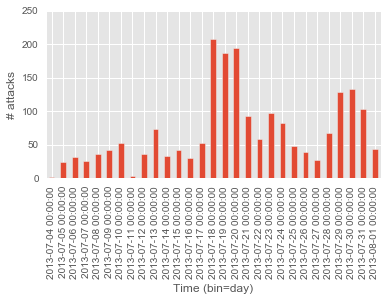

2. Number of attacks performed by users


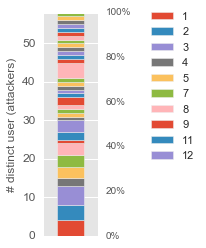

3. Attacks on the same target


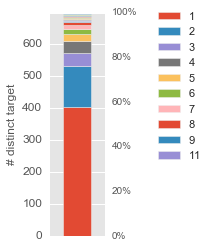

4. Intersection between users, customers and attackers.


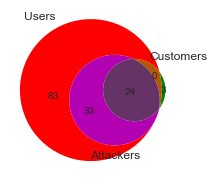

5. User login times


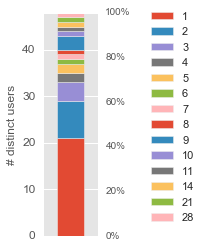



6. From 1993 total attack records, 260 have a login time to be correlated with. The difference between the attack and the closest login time is on average 3 days 10:14:12.734615, while the median is equal to 1 days 20:12:29


7. The number of distinct users that access this Booter via TOR is equal to 0


8. User distinct IP addresses


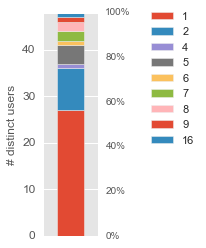

9. User distinct payments


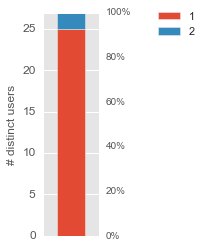

10. Amount of money paid.


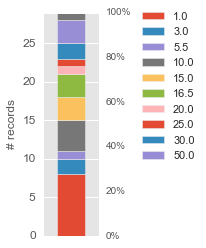



11. The (estimated) amount of money earned by this Booter is equal to US$ 509.00


12. Countries from where users (IPs) accessed the Booter.


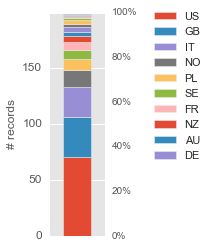

13. Countries of blacklisted IPs.


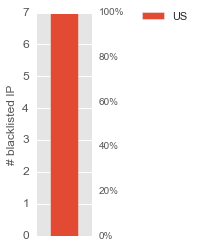

14. Target (IP) countries.


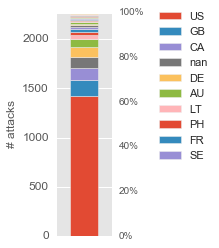

16. Who attacked whom in the country level.


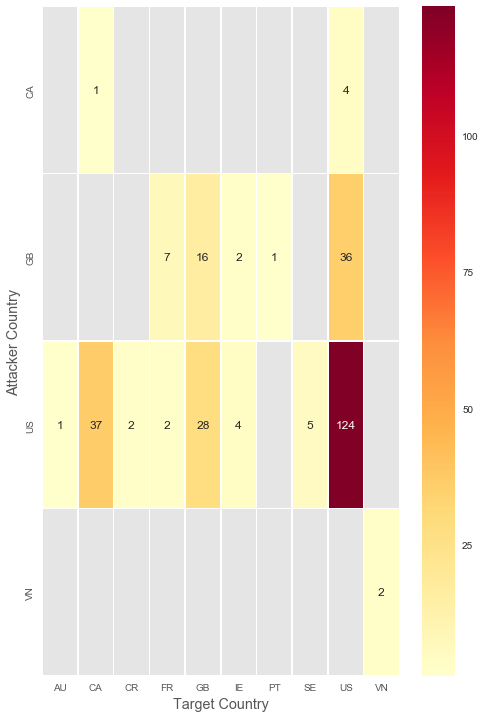

In [31]:
%run '../automated_analysis.ipynb'

<h2 align="center">!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<br>
Query Interface<br>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</h2> 

In [32]:
%run '../search_background.ipynb'


Searching by Country = Netherlands 

Table df_logins (as ATTACKER):


,id,userid,userip,date,username,middledate,srcasn,srcip,srcbgp_prefix,srccountry,srcregistry,srcinfo_date,srcinfo_request,as_name
51,232,201,217.121.205.53,2012-11-04 15:42:56,,2013-05-24 01:23:23,9143.0,217.121.205.53,217.120.0.0/15,NL,ripencc,2000-12-19,2013-05-24 01:23:23,"ZIGGO Ziggo B.V., NL"
52,231,201,217.121.205.53,2012-11-04 15:42:35,,2013-05-24 01:23:23,9143.0,217.121.205.53,217.120.0.0/15,NL,ripencc,2000-12-19,2013-05-24 01:23:23,"ZIGGO Ziggo B.V., NL"
134,428,461,94.210.166.78,2012-12-04 17:21:33,,2013-05-24 01:23:23,9143.0,94.210.166.78,94.208.0.0/14,NL,ripencc,2008-07-22,2013-05-24 01:23:23,"ZIGGO Ziggo B.V., NL"


Table df_attacks (as TARGET):


,username,targetip,port,duration,type,date,id,targeturl,userid,middledate,targetasn,ip,targetbgp_prefix,country,targetregistry,targetinfo_date,targetinfo_request,as_name,nearestlogin
25,kanewayne,217.23.4.171,80,1000,DRDOS,2013-07-05 13:15:26,NaN,NaN,872.0,2013-05-24 01:23:23,49981,217.23.4.171,217.23.0.0/20,NL,ripencc,2009-02-04,2013-05-24 01:23:23,"WORLDSTREAM +++ Transit Imports, NL",NaT
159,doseon,217.23.1.72,80,300,DRDOS,2013-07-09 09:20:02,NaN,NaN,870.0,2013-05-24 01:23:23,49981,217.23.1.72,217.23.0.0/20,NL,ripencc,2009-02-04,2013-05-24 01:23:23,"WORLDSTREAM +++ Transit Imports, NL",NaT
252,NYREX,94.102.51.225,80,30,DRDOS,2013-07-12 09:10:29,NaN,NaN,849.0,2013-05-24 01:23:23,29073,94.102.51.225,94.102.48.0/20,NL,ripencc,2008-08-29,2013-05-24 01:23:23,"QUASINETWORKS, NL",NaT
1388,NYREX,93.174.93.103,80,60,udp,2013-07-21 16:17:01,NaN,NaN,849.0,2013-05-24 01:23:23,29073,93.174.93.103,93.174.88.0/21,NL,ripencc,2008-06-20,2013-05-24 01:23:23,"QUASINETWORKS, NL",NaT
1586,AngryWaffle,85.17.73.240,80,150,udp,2013-07-24 02:12:11,NaN,NaN,858.0,2013-05-24 01:23:23,60781,85.17.73.240,85.17.0.0/16,NL,ripencc,2005-03-11,2013-05-24 01:23:23,"LEASEWEB-NL Netherlands, NL",NaT
1588,AngryWaffle,85.17.73.240,80,100,udp,2013-07-24 02:12:22,NaN,NaN,858.0,2013-05-24 01:23:23,60781,85.17.73.240,85.17.0.0/16,NL,ripencc,2005-03-11,2013-05-24 01:23:23,"LEASEWEB-NL Netherlands, NL",NaT
1589,AngryWaffle,85.17.73.240,80,100,udp,2013-07-24 02:12:38,NaN,NaN,858.0,2013-05-24 01:23:23,60781,85.17.73.240,85.17.0.0/16,NL,ripencc,2005-03-11,2013-05-24 01:23:23,"LEASEWEB-NL Netherlands, NL",NaT
1590,AngryWaffle,85.17.73.240,80,150,udp,2013-07-24 02:13:25,NaN,NaN,858.0,2013-05-24 01:23:23,60781,85.17.73.240,85.17.0.0/16,NL,ripencc,2005-03-11,2013-05-24 01:23:23,"LEASEWEB-NL Netherlands, NL",NaT
1591,AngryWaffle,85.17.73.240,80,150,udp,2013-07-24 02:13:39,NaN,NaN,858.0,2013-05-24 01:23:23,60781,85.17.73.240,85.17.0.0/16,NL,ripencc,2005-03-11,2013-05-24 01:23:23,"LEASEWEB-NL Netherlands, NL",NaT
1752,Topaz,109.201.152.1,80,10,udp,2013-07-26 19:30:55,NaN,NaN,875.0,2013-05-24 01:23:23,43350,109.201.152.1,109.201.128.0/19,NL,ripencc,2010-02-12,2013-05-24 01:23:23,"NFORCE, NL",NaT


In [33]:
df_attacks.head()

,username,targetip,port,duration,type,date,id,targeturl,userid,middledate,nearestlogin
0,NYREX,192.184.90.118,80,300,DRDOS,2013-07-16 21:20:52,NaN,NaN,849.0,2013-05-24 01:23:23,NaT
1,NYREX,192.184.90.118,80,300,DRDOS,2013-07-16 21:21:07,NaN,NaN,849.0,2013-05-24 01:23:23,NaT
2,tntwolve,85.25.95.84,80,1100,DRDOS,2013-07-18 04:15:13,NaN,NaN,854.0,2013-05-24 01:23:23,NaT
3,tntwolve,85.25.95.84,80,1100,DRDOS,2013-07-18 03:55:40,NaN,NaN,854.0,2013-05-24 01:23:23,NaT
4,AlexKvazos,66.160.140.234,80,200,DRDOS,2013-07-18 03:53:08,NaN,NaN,934.0,2013-05-24 01:23:23,NaT
